## Stochastic Average Gradient Algorithm

- to deal with the big 'N' problem

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
# dataset

tau_vals = [0.1, 0.3, 0.5, 0.9, 0.99]
tau_lst = tau_vals
alpha_lst = np.round([tau if tau<= 0.5 else 1-tau for tau in tau_lst], 4)
np.ones(5) * 0.5

array([0.5, 0.5, 0.5, 0.5, 0.5])

In [3]:
def update_q(q, x, y, tau, N, alpha = 1):
    pinball_loss = tau if x > q else (tau-1)
    q += ((N)*y + pinball_loss)*alpha/N
    y = pinball_loss
    return q, y

In [4]:
def update_q_lst(q_lst, tau_lst, y_lst, x, N, changing_alpha = True):
#     print (y_lst)
    alpha_lst = np.round([tau if tau<= 0.5 else 1-tau for tau in tau_lst], 4)
    if not changing_alpha: alpha_lst = np.ones(len(tau_lst)) * 0.5
    for i, q in enumerate(q_lst):
        tau = tau_lst[i]
        y = y_lst[i]
#         alpha = tau if tau<= 0.5 else 1-tau
        alpha = alpha_lst[i]
        q, y = update_q(q, x, y, tau, N, (1/(alpha)))
        q_lst[i] = q
        y_lst[i] = round(y, 5)
    return q_lst, y_lst

update_q_lst(np.array([-3, -0.4, 0.6, 5, 89]), tau_vals, [ 0.1 ,  0.3 , -0.5 , -0.1 , -0.01], 0.37, 30000)

(array([-1.99996667,  0.60003333, -0.40003333,  3.99996667, 87.99996667]),
 [0.1, 0.3, -0.5, -0.1, -0.01])

In [5]:
def get_results(dt, tau_lst, changing_alpha = True):
    N = dt.shape[0]
    q_procs = np.zeros((N, len(tau_lst)))
    q_lst = np.zeros(len(tau_lst))
    y_lst = np.zeros(len(tau_lst))
    for i, x in enumerate(dt):
        q_lst, y_lst = update_q_lst(q_lst, tau_lst, y_lst, x, N, changing_alpha)
        q_procs[i]= q_lst
    return q_procs

In [6]:
def update_q_lst_sgd(q_lst, tau_lst, x, alpha = 1):
    for i, q in enumerate(q_lst):
        tau = tau_lst[i]
        q += alpha * (tau) if x > q else (tau-1)
        q_lst[i] = q
    return q_lst

def get_results_sgd(dt, tau_lst=tau_vals):
    N = dt.shape[0]
    q_procs = np.zeros((N, len(tau_lst)))
    q_lst = np.zeros(len(tau_lst))
    for i, x in enumerate(dt):
        q_lst = update_q_lst_sgd(q_lst, tau_lst, x)
        q_procs[i] = q_lst
    return q_procs

In [7]:
datasize = 50000
dt = np.random.normal(-20, 100, datasize)
# dt = np.random.uniform(-200, 600, 50000)
# dt2 = np.random.uniform(-400, 400, 500000)


proc = get_results(dt, tau_vals)
proc2 = get_results(dt, tau_vals, False)
proc_sgd = get_results_sgd(dt, tau_lst=tau_vals)

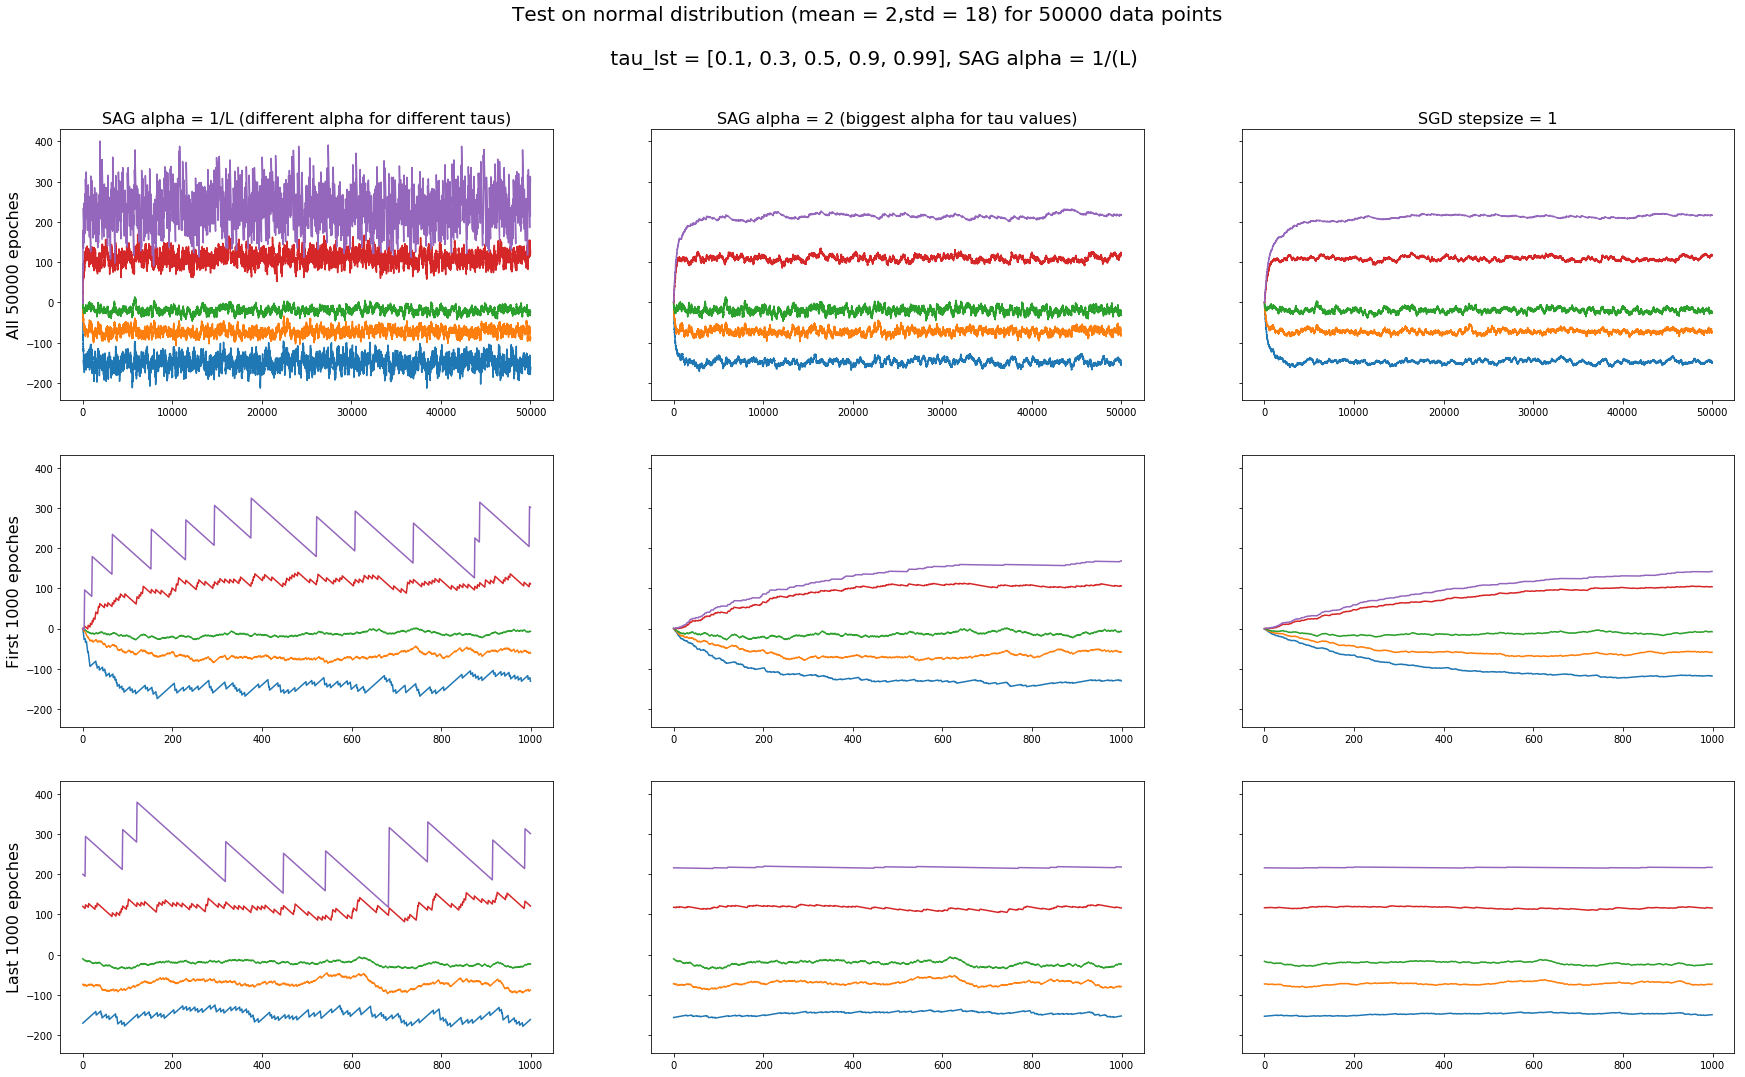

In [8]:
fig, axes = plt.subplots(3, 3, sharey=True)
fig.set_size_inches(30, 17)
fig.suptitle("Test on normal distribution (mean = 2,std = 18) for {} data points \n\n tau_lst = {}, SAG alpha = 1/({}L)"
             .format(dt.shape[0], tau_vals, ''),
            fontsize = 20)

axes[0][0].set_title("SAG alpha = 1/L (different alpha for different taus)", fontsize = 16)
axes[0][1].set_title("SAG alpha = 2 (biggest alpha for tau values)", fontsize = 16)
axes[0][2].set_title("SGD stepsize = 1", fontsize = 16)

axes[0][0].set_ylabel("All 50000 epoches", fontsize = 16)
axes[1][0].set_ylabel("First 1000 epoches", fontsize = 16)
axes[2][0].set_ylabel("Last 1000 epoches", fontsize = 16)

# axes[0][2].yaxis.set_label_position("right")
# axes[0][2].yaxis.tick_right()
# axes[0][2].set_ylabel("Overall behaviour \n", fontsize = 16)
# axes[1][2].yaxis.set_label_position("right")
# axes[1][2].yaxis.tick_right()

# axes[2][2].yaxis.set_label_position("right")
# axes[2][2].yaxis.tick_right()

axes[0][0].plot(proc)
axes[0][1].plot(proc2)
axes[0][2].plot(proc_sgd)
axes[1][0].plot(proc[:1000])
axes[1][1].plot(proc2[:1000])
axes[1][2].plot(proc_sgd[:1000])
axes[2][0].plot(proc[-1000:])
axes[2][1].plot(proc2[-1000:])
axes[2][2].plot(proc_sgd[-1000:])


plt.show()
fig.savefig("Experiment_results/SAG/Exp1.png")

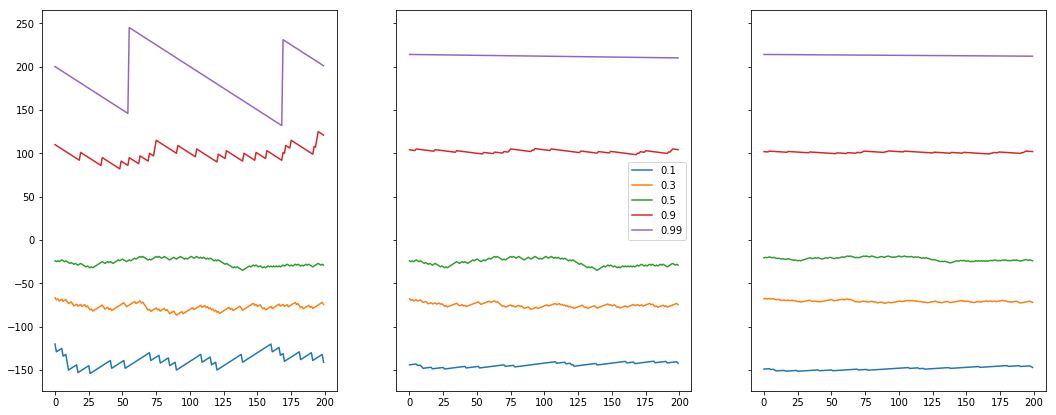

In [9]:
fig, axes = plt.subplots(1, 3, sharey=True)
fig.set_size_inches(18, 7)

axes[0].plot(proc[35000:35200])
axes[1].plot(proc2[35000:35200])
axes[2].plot(proc_sgd[35000:35200])
axes[1].legend(tau_vals)
plt.show()

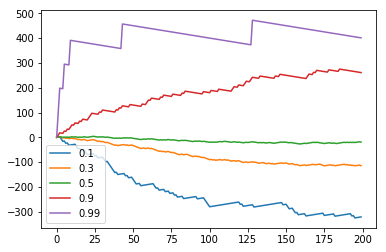

In [151]:
plt.plot(proc[:200])
plt.legend(tau_vals)
plt.show()

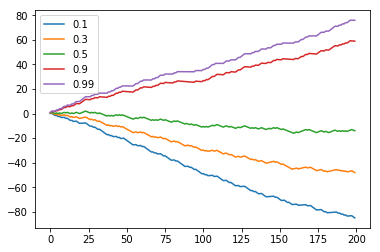

In [152]:
plt.plot(proc_sgd[:200])
plt.legend(tau_vals)
plt.show()